# 環境準備

## 安裝快樂版函式庫

In [ ]:
# 先檢查是否存在 HappyML 這個資料夾，若沒有，則下載
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

# 資料集前處理

## 載入資料集

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

## 切分自變數與應變數

In [ ]:
import HappyML.preprocessor as pp

# Decomposition of dataset to X and Y
import pandas as pd
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
Y = pd.DataFrame(dataset.target, columns=["Price"])

## 切分訓練集、測試集與特徵縮放

In [ ]:
# Split Training vs. Testing Data
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8)

# Feature Scaling (Optional)
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

# 建構神經網路

## 建構神經網路各層級

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Add Layers with .add() function
model = Sequential()

# Using Formula #2, Instance=20640, alpha=5
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=459, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

## 神經網路編譯

In [ ]:
# Compile the whole Neural Networks
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# 模型訓練與校正

## 模型訓練

In [ ]:
# Training (Fit)
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.9851 - mse: 0.9851 - val_loss: 0.4149 - val_mse: 0.4149
Epoch 2/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3781 - mse: 0.3781 - val_loss: 0.3938 - val_mse: 0.3938
Epoch 3/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3658 - mse: 0.3658 - val_loss: 0.4053 - val_mse: 0.4053
Epoch 4/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3386 - mse: 0.3386 - val_loss: 0.3485 - val_mse: 0.3485
Epoch 5/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3151 - mse: 0.3151 - val_loss: 0.3475 - val_mse: 0.3475
Epoch 6/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3295 - mse: 0.3295 - val_loss: 0.3354 - val_mse: 0.3354
Epoch 7/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.3173 - mse: 0.3173 - val_loss: 0.3343 - val_mse: 0.3343
Epoch 8/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3065 - mse: 0.3065 - val_loss: 0.3229 - val_mse: 0.3229
Epoch 9/50
2642/2642 ━━━━━━━━━━━━━━━━

## 模型校正

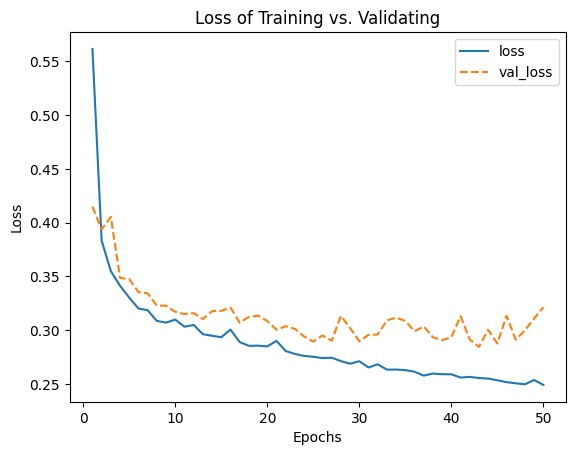

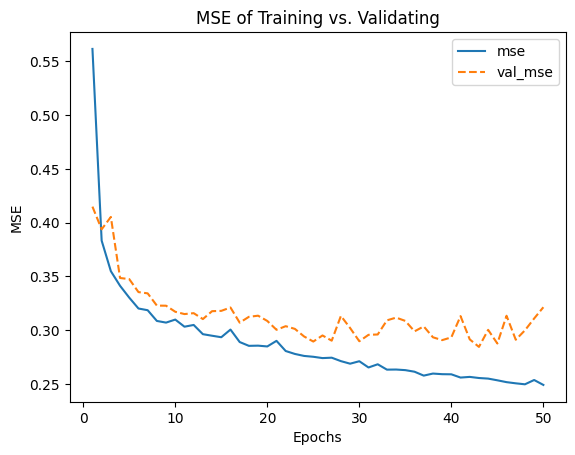

In [ ]:
# Model Adjustment
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

# 模型預測與評估

## 模型預測

In [ ]:
# Predict
import pandas as pd
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# Show the Predict Result
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
         Price     Price
12440  1.55000  0.838979
17928  2.66100  2.741354
7514   1.10700  1.899842
4277   2.11100  2.288058
10647  5.00001  4.313577
...        ...       ...
19928  0.87700  0.787793
6900   2.11500  1.675647
11427  2.13000  2.626191
1956   1.08300  0.884006
13398  1.03000  1.407667

[4128 rows x 2 columns]


## 模型評估

In [ ]:
# Evaluation
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2965 - mse: 0.2965
Loss of Testing Set: 0.298355370759964
MSE of Testing Set: 0.298355370759964
